WHAT IS ggplot2?

ggplot2 is an actively maintained open-source chart-drawing package for R, written by Hadley Wickham, based upon the principles of "Grammar of Graphics". It partially replaces R's basic plot and the lattice package, while providing a clean, powerful, orthogonal and fun API.

Classes 'tbl_df', 'tbl' and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


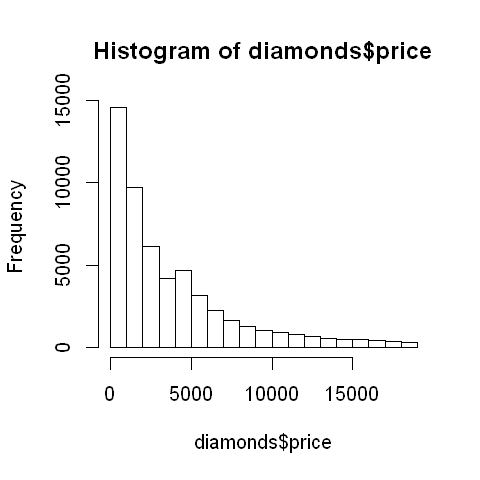

In [1]:
##some re-scaling of plots for my notebook
library(repr)
options(repr.plot.width=4, repr.plot.height=4)

##loading ggplot2 package
library(ggplot2)

##Structure of Diamonds
str(diamonds)

##Basic Histogram without ggplot2
hist(diamonds$price)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


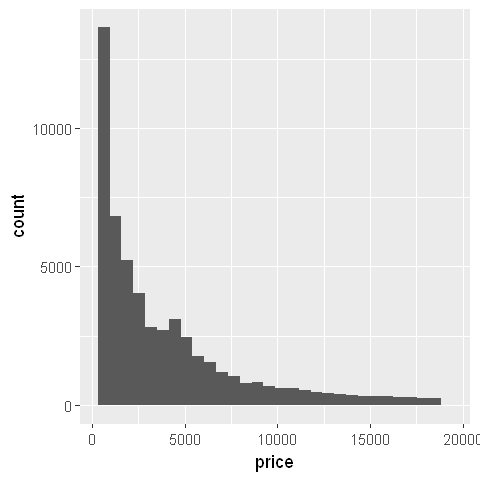

In [2]:
ggplot(diamonds, aes(x = price)) + geom_histogram()

##ignore for now the red comment, we will come back to it later

DIFFERENCES BETWEEN BASE GRAPHICS AND ggplot2
---------------------------------------

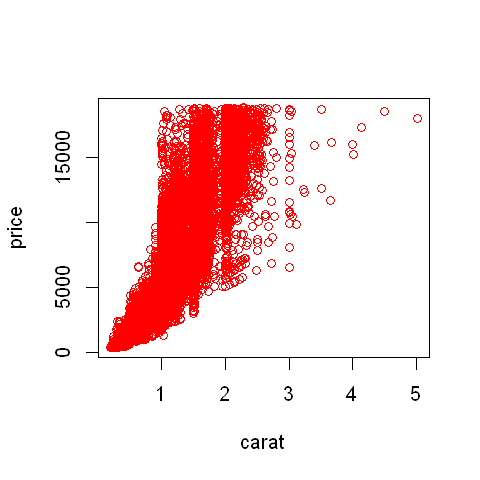

In [3]:
plot(price ~ carat, data= diamonds)
points(price ~ carat, col="red", data=diamonds)

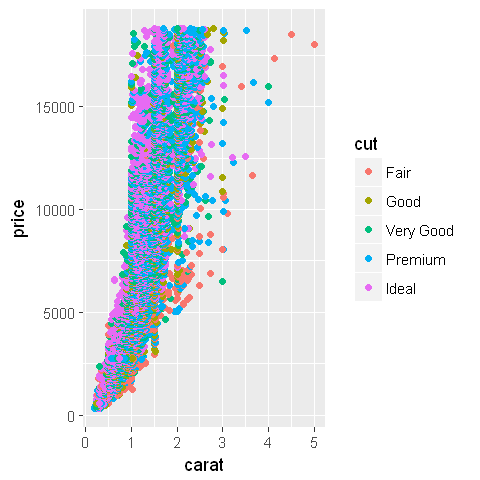

In [4]:
ggplot(diamonds, aes(x=carat, y=price, color=cut))+ geom_point()

In [5]:
##first rows of the dataset
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Format: A data frame with 53940 rows and 10 variables

Description: A dataset containing the prices and other attributes of almost 54,000 diamonds. The variables are as follows:

- price. price in US dollars (\$326--\$18,823)
- carat. weight of the diamond (0.2--5.01)
- cut. quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- colour. diamond colour, from J (worst) to D (best)
- clarity. a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best))
- x. length in mm (0--10.74)
- y. width in mm (0--58.9)
- z. depth in mm (0--31.8)
- depth. total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table. width of top of diamond relative to widest point (43--95)

http://docs.ggplot2.org/0.9.3.1/diamonds.html

Lets Start With qplot()
----------------------

For start we will learn to make a wide variety of plots with our first ggplot2 function: qplot, short for quick plot. 

qplot makes it easy to produce complex plots, often requiring several lines of code using other plotting systems, in one line. qplot() can do this because it's based on the grammar of graphics, which allows you to create a simple, yet expressive, description of the plot.

qplot() has been designed to be very similar to plot(), which should make it easy if you're already familiar with plotting in R. 

During an R session you can always get a summary of all the arguments to qplot() with R help, ?qplot.

SCATTER-PLOTS
--------------

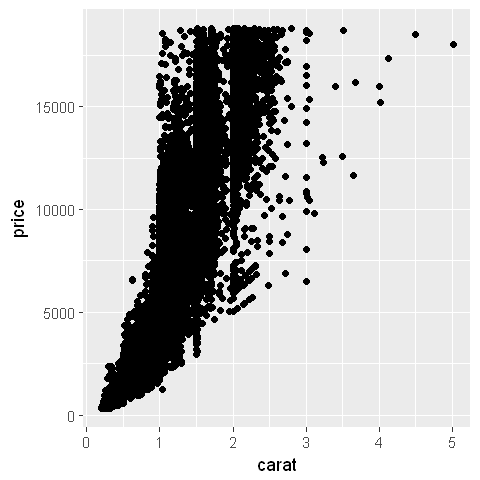

In [6]:
qplot(carat, price, data = diamonds)

Lets have a look:

qplot(x, y, data=, color=, shape=, size=, alpha=, geom=, method=, formula=, facets=, xlim=, ylim= xlab=, ylab=, main=, sub=)

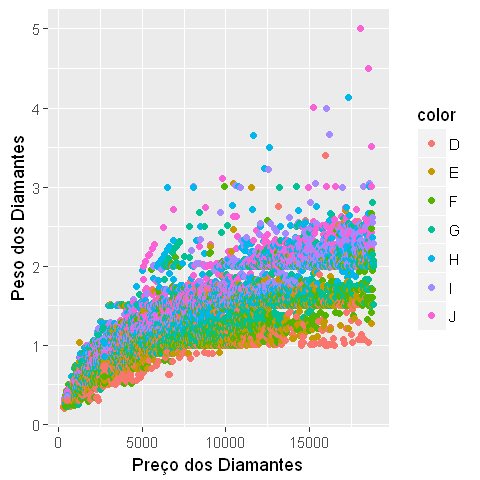

In [7]:
qplot(price, carat, data=diamonds, color=color, xlab="Preço dos Diamantes", ylab="Peso dos Diamantes")

QUESTION:

- Look at the dataset airquality that comes with R
- Plot a scatter plot of Ozone Vs. Day
- Name the axis
- Let Wind be the color

In [8]:
head(airquality)
##There are many NA's in this dataset. Be carefull!

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


Warning message:
"Removed 37 rows containing missing values (geom_point)."

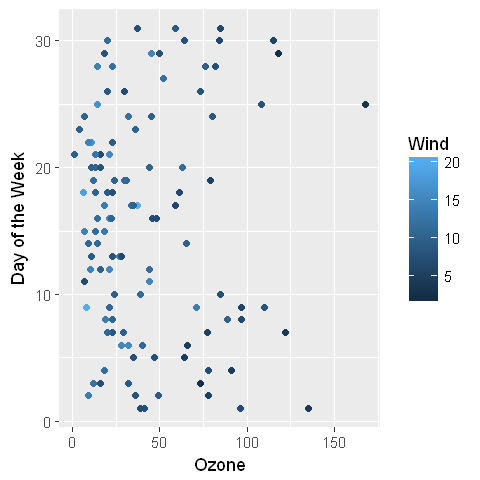

In [9]:
library(datasets)
qplot(Ozone, Day, data=airquality, color=Wind, xlab="Ozone", ylab="Day of the Week")

Colour, size and shape are all examples of aesthetic attributes, visual properties that affect the way observations are displayed. 

Back to diamonds:

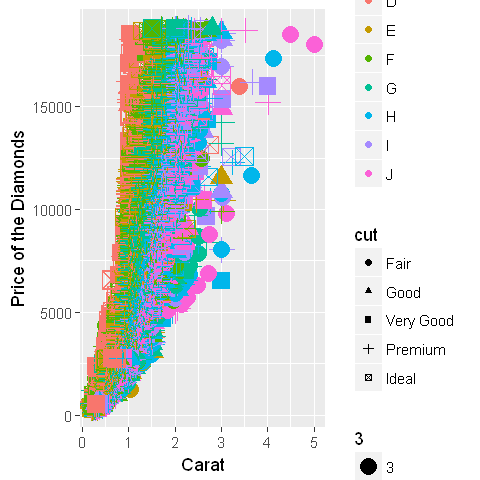

In [10]:
qplot(carat, price, data = diamonds, color=color, shape=cut, size=3, xlab="Carat", 
      ylab="Price of the Diamonds")

To make a semi-transparent colour you can use the alpha aesthetic, which takes a value between 0 (completely transparent) and 1 (complete opaque). 

It's often useful to specify the transparency as a fraction, e.g., 1/10 or 1/20, as the denominator specifies the number of points that must overplot to get a completely opaque colour.

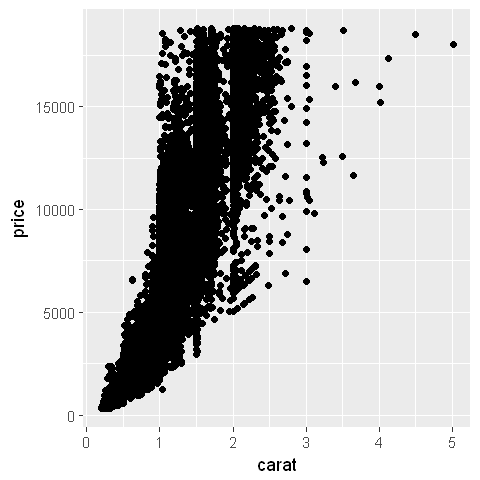

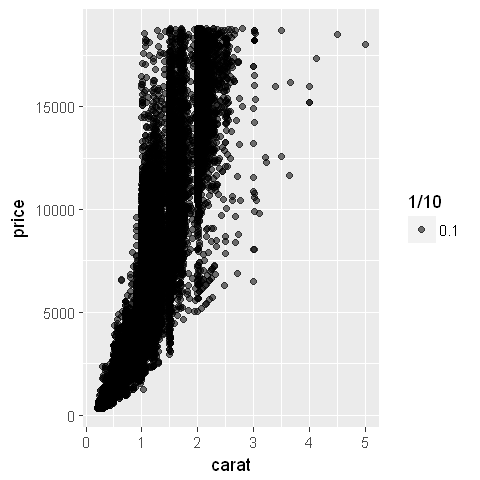

In [11]:
qplot(carat, price, data = diamonds)
qplot(carat, price, data = diamonds, alpha = 1/10)

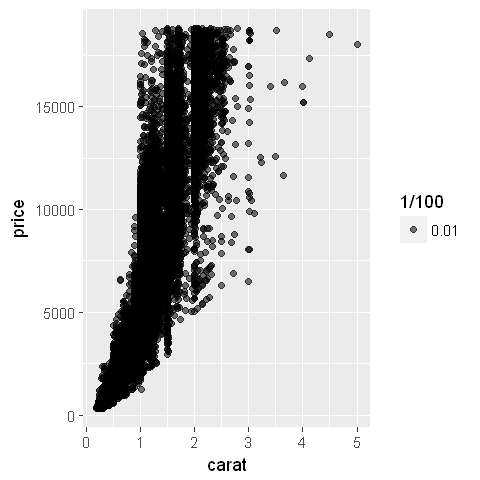

In [12]:
qplot(carat, price, data = diamonds, alpha = 1/100)

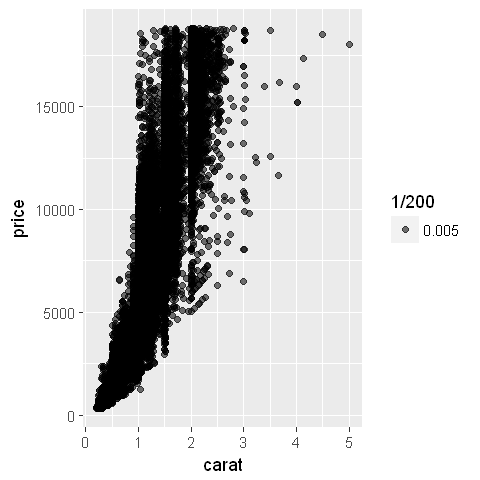

In [13]:
qplot(carat, price, data = diamonds, alpha = 1/200)

qplot is not limited to scatterplots, but can produce almost any kind of plot by varying the geom. 

Geom, short for geometric object, describes the type of object that is used to display the data.

The following geoms enable you to investigate two-dimensional relationships:

geom = "point" draws points to produce a scatterplot. This is the default when you supply both x and y arguments to qplot().

geom = "smooth" fits a smoother to the data and displays the smooth and its standard error.

geom = "boxplot" produces a box-and-whisker plot to summarise the distribution of a set of points.

geom = "path" and geom = "line" draw lines between the data points. Traditionally these are used to explore relationships between time and another variable, but lines may be used to join observations connected in some other way. A line plot is constrained to produce lines that travel from left to right, while paths can go in any direction.

For 1d distributions, your choice of geoms is guided by the variable type:

For continuous variables, geom = "histogram" draws a histogram, geom = "freqpoly" a frequency polygon, and geom = "density" creates a density plot. The histogram geom is the default when you only supply an x value to qplot().

For discrete variables, geom = "bar" makes a bar chart.

Lets add a smoothed line to the plot. This is easily done using the smooth geom.

USING geom_
-----------

`geom_smooth()` using method = 'gam'


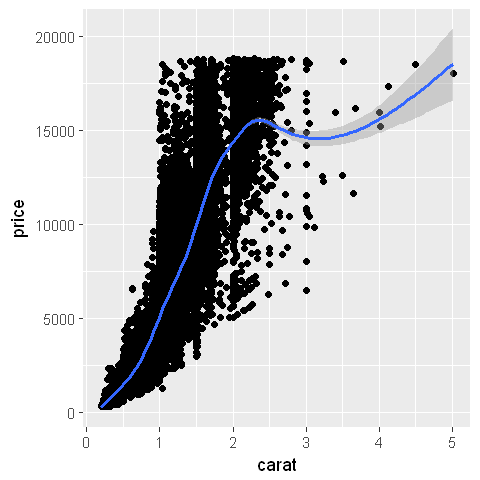

In [14]:
qplot(carat, price, data = diamonds, geom = c("point", "smooth"))

In [15]:
diamonds_small <- diamonds[sample(1:nrow(diamonds), 500, replace=FALSE),]
str(diamonds_small)

Classes 'tbl_df', 'tbl' and 'data.frame':	500 obs. of  10 variables:
 $ carat  : num  0.34 1.54 1.22 2.09 0.39 0.54 1.17 0.66 1.52 0.31 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 4 4 5 4 5 5 2 5 4 4 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 4 2 5 5 4 6 7 2 5 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 4 2 5 2 4 2 3 2 5 3 ...
 $ depth  : num  61.6 59 61.9 62.1 60.7 60.9 63.9 61.9 61.4 62.7 ...
 $ table  : num  58 62 54 58 54 57 55 55 58 58 ...
 $ price  : int  765 8020 8411 17156 745 935 4054 1560 11621 558 ...
 $ x      : num  4.51 7.59 6.88 8.22 4.74 5.26 6.66 5.61 7.44 4.34 ...
 $ y      : num  4.45 7.56 6.9 8.17 4.77 5.31 6.73 5.64 7.3 4.31 ...
 $ z      : num  2.76 4.47 4.26 5.09 2.89 3.22 4.28 3.48 4.55 2.71 ...


`geom_smooth()` using method = 'loess'


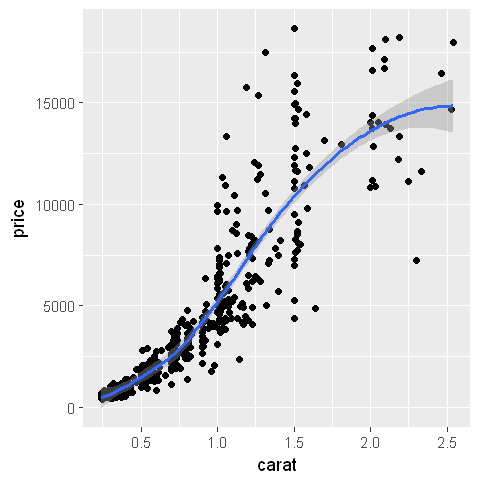

In [16]:
qplot(carat, price, data = diamonds_small, geom = c("point", "smooth"))

Looks like there is an exponential relationship between price and carat. 

There are few diamonds bigger than three carats, and our uncertainty in the form of the relationship increases as illustrated by the point-wise confidence interval shown in grey. 

There are many different smoothers you can choose between.


BOX-PLOTS
----------

When a set of data includes a categorical variable and one or more continuous variables, you will probably be interested to know how the values of the continuous variables vary with the levels of the categorical variable. Box-plots and jittered points offer two ways to do this. 

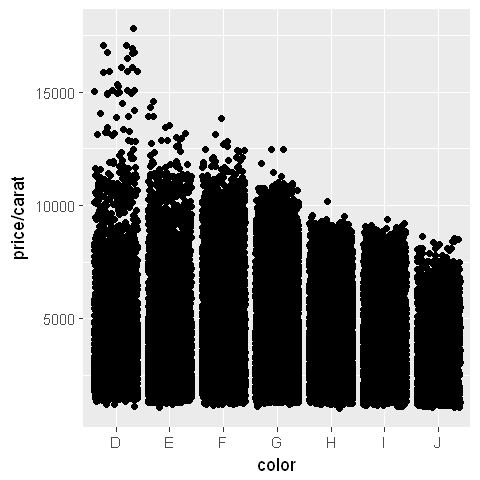

In [17]:
qplot(color, price / carat, data = diamonds, geom = "jitter")

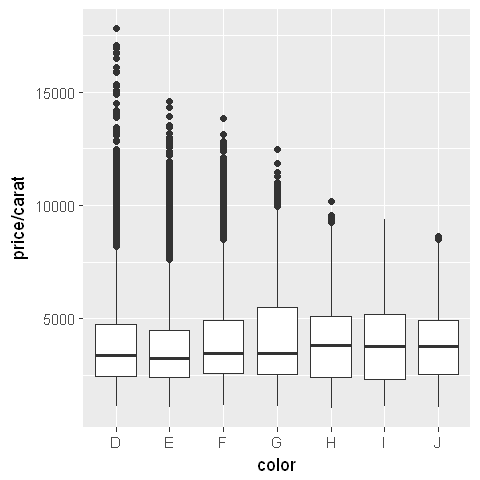

In [18]:
qplot(color, price / carat, data = diamonds, geom = "boxplot")

Each method has its strengths and weaknesses. Boxplots summarise the bulk of the distribution with only five numbers, while jittered plots show every point but can suffer from overplotting.

The overplotting seen in the plot of jittered values can be alleviated somewhat by using semi-transparent points using the alpha argument. 

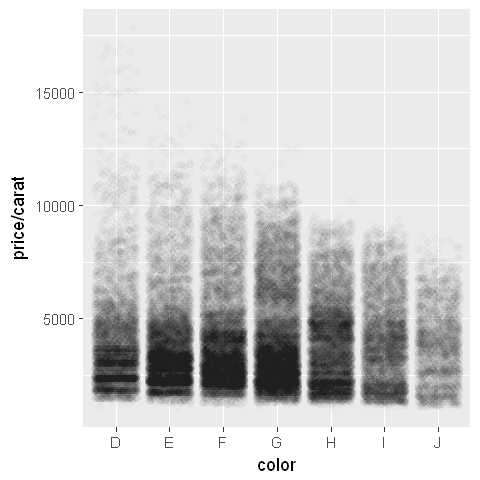

In [19]:
qplot(color, price / carat, data = diamonds, geom = "jitter", alpha = I(1 / 60))

Histogram and density plots 
----

They show the distribution of a single variable. 

They provide more information about the distribution of a single group than boxplots do, but it is harder to compare many groups

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


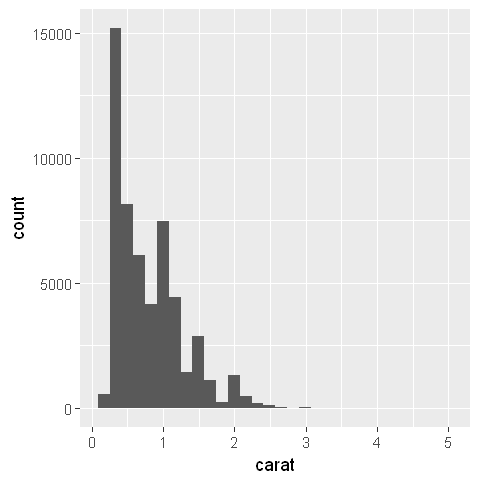

In [20]:
qplot(carat, data = diamonds, geom = "histogram")
##once again ignore the red alert

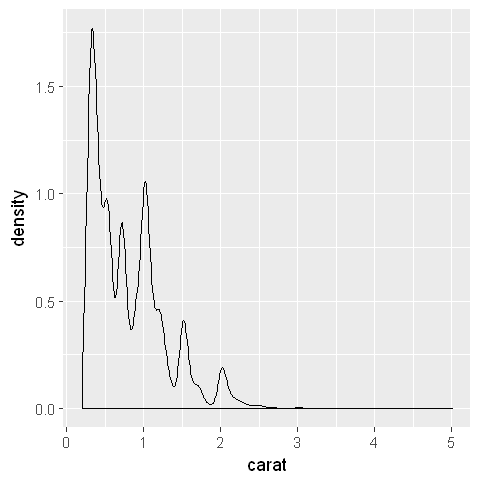

In [21]:
qplot(carat, data = diamonds, geom = "density")

For the density plot, the adjust argument controls the degree of smoothness (high values of adjust produce smoother plots). 

For the histogram, the binwidth argument controls the amount of smoothing by setting the bin size. 

EXPLANE HERE BINWIDTH A BIT?????
--

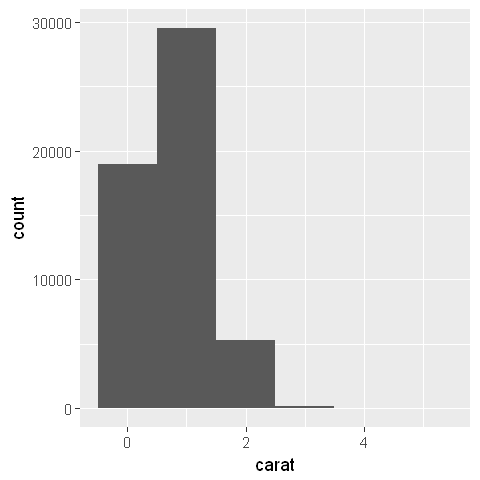

In [22]:
qplot(carat, data = diamonds, geom = "histogram", binwidth = 1)

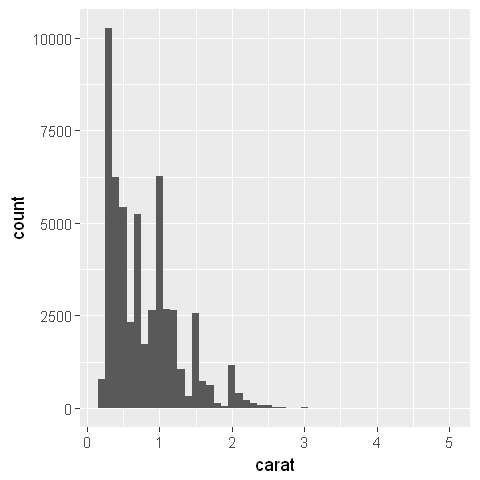

In [23]:
qplot(carat, data = diamonds, geom = "histogram", binwidth = 0.1)

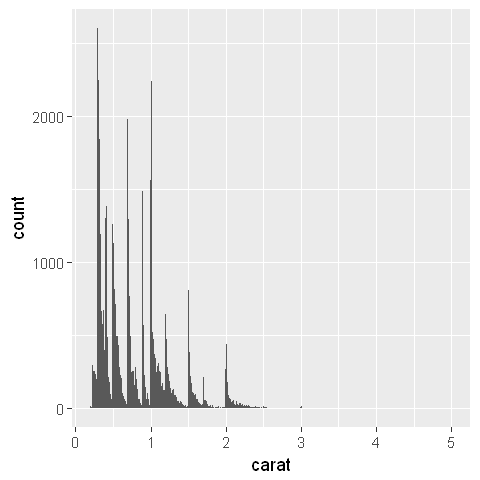

In [24]:
qplot(carat, data = diamonds, geom = "histogram", binwidth = 0.01)

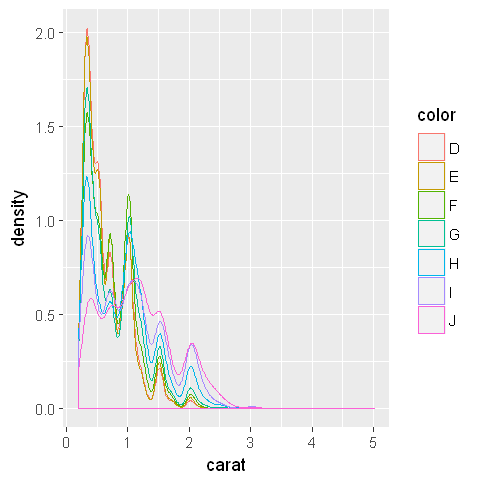

In [25]:
qplot(carat, data = diamonds, geom = "density", colour = color)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


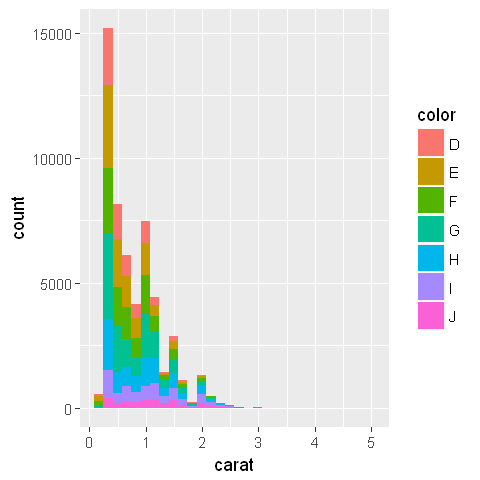

In [26]:
qplot(carat, data = diamonds, geom = "histogram", fill = color)

BAR CHARTS
---

The discrete analogue of histogram is the bar chart, geom = "bar". 


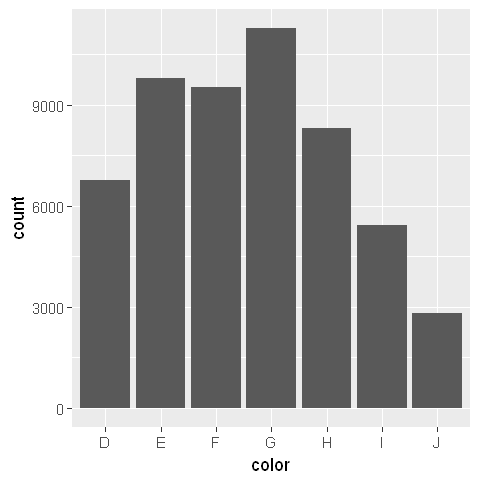

In [27]:
qplot(color, data = diamonds, geom = "bar")

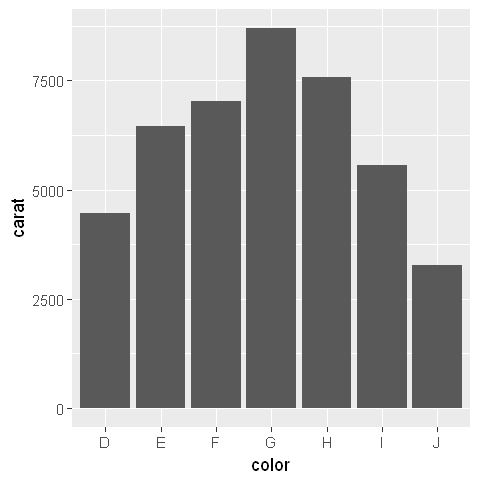

In [28]:
qplot(color, data = diamonds, geom = "bar", weight = carat) + scale_y_continuous("carat")

Line and path plots 
--------------------

Typically used for time series data. Line plots join the points from left to right, while path plots join them in the order that they appear in the dataset. 

Line plots usually have time on the x-axis, showing how a single variable has changed over time. 

Path plots show how two variables have simultaneously changed over time, with time encoded in the way that the points are joined together.

In [29]:
str(economics)

Classes 'tbl_df', 'tbl' and 'data.frame':	574 obs. of  6 variables:
 $ date    : Date, format: "1967-07-01" "1967-08-01" ...
 $ pce     : num  507 510 516 513 518 ...
 $ pop     : int  198712 198911 199113 199311 199498 199657 199808 199920 200056 200208 ...
 $ psavert : num  12.5 12.5 11.7 12.5 12.5 12.1 11.7 12.2 11.6 12.2 ...
 $ uempmed : num  4.5 4.7 4.6 4.9 4.7 4.8 5.1 4.5 4.1 4.6 ...
 $ unemploy: int  2944 2945 2958 3143 3066 3018 2878 3001 2877 2709 ...


FORMAT

A data frame with 478 rows and 6 variables

- date, month of data collection
- psavert, personal savings rate
- pce, personal consumption expenditures, in billions of dollars
- unemploy, number of unemployed in thousands
- uempmed, median duration of unemployment, in week
- pop, total population, in thousands

In [30]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958
1967-10-01,512.9,199311,12.5,4.9,3143
1967-11-01,518.1,199498,12.5,4.7,3066
1967-12-01,525.8,199657,12.1,4.8,3018


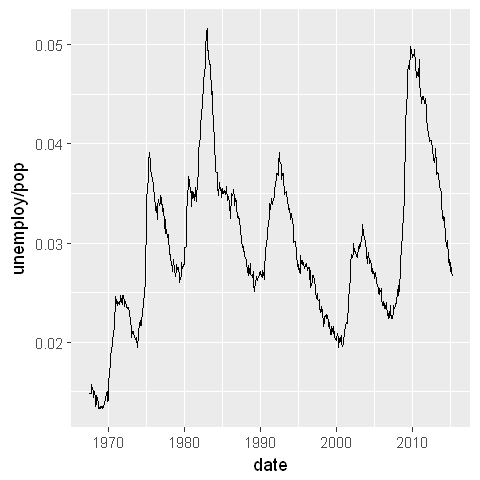

In [31]:
qplot(date, unemploy / pop, data = economics, geom = "line")

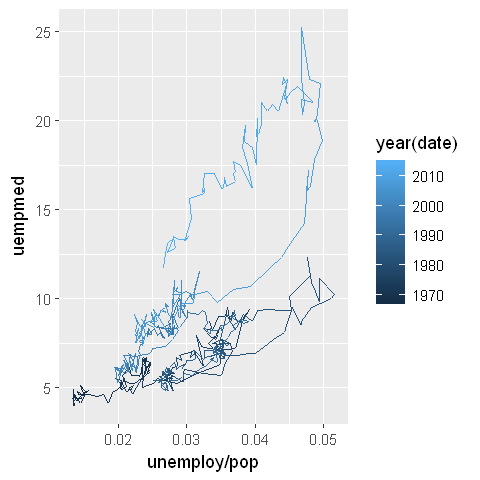

In [32]:
year <- function(x) as.POSIXlt(x)$year + 1900
qplot(unemploy / pop, uempmed, data = economics, geom = "path", colour = year(date))

FACETING
--------

Faceting takes an alternative approach: It creates tables of graphics by splitting the data into subsets and displaying the same graph for each subset in an arrangement that facilitates comparison.

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."

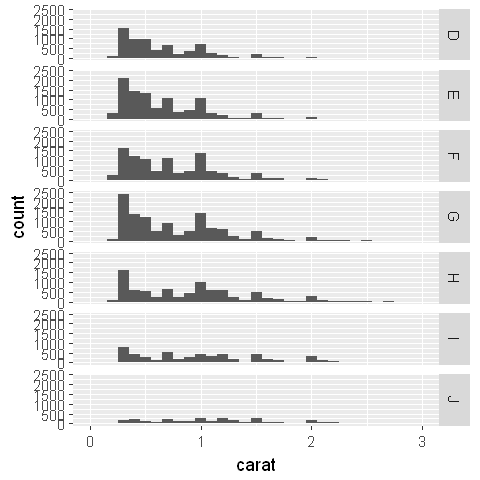

In [33]:
qplot(carat, data = diamonds, geom = "histogram", binwidth = 0.1, xlim = c(0, 3)) + facet_grid(color ~ .)

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."

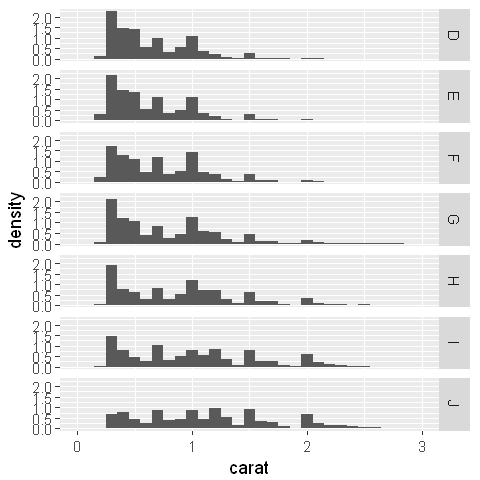

In [34]:
qplot(carat, ..density.., data = diamonds, geom = "histogram", binwidth = 0.1, xlim = c(0, 3)) + facet_grid(color ~ .)

And now THE ggplot!!
---------------------

"gg" stand for grammar of graphics.

This means ggplot2 contains building blocks with which you can create your own graphical objects. 

What are the basic components of ggplot2 plots?

- DATA FRAME, which contains the data we are trying to plot
- AESTHETIC MAPPINGS determine how data are mapped to color, size, shape, etc
- GEOMS (geometric objects) are what you see in the plot (points, lines, shapes)
- FACETS are the panels used in conditional plots
- STATS are statistical transformations such as binning, quantiles, and smoothing which ggplot2 applies to the data
- SCALES show what coding an aesthetic map uses (for example, male = red, female = blue)
- COORDINATE SYSTEM


When building plots with ggplot, the plots are built up in layers. 

You can plot the data and then overlay a summary (for instance, a regression line or smoother). 

In [35]:
str(diamonds_small)

Classes 'tbl_df', 'tbl' and 'data.frame':	500 obs. of  10 variables:
 $ carat  : num  0.34 1.54 1.22 2.09 0.39 0.54 1.17 0.66 1.52 0.31 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 4 4 5 4 5 5 2 5 4 4 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 4 2 5 5 4 6 7 2 5 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 4 2 5 2 4 2 3 2 5 3 ...
 $ depth  : num  61.6 59 61.9 62.1 60.7 60.9 63.9 61.9 61.4 62.7 ...
 $ table  : num  58 62 54 58 54 57 55 55 58 58 ...
 $ price  : int  765 8020 8411 17156 745 935 4054 1560 11621 558 ...
 $ x      : num  4.51 7.59 6.88 8.22 4.74 5.26 6.66 5.61 7.44 4.34 ...
 $ y      : num  4.45 7.56 6.9 8.17 4.77 5.31 6.73 5.64 7.3 4.31 ...
 $ z      : num  2.76 4.47 4.26 5.09 2.89 3.22 4.28 3.48 4.55 2.71 ...


In [36]:
g <- ggplot(diamonds_small, aes(carat, price))

In [37]:
summary(g)

data: carat, cut, color, clarity, depth, table, price, x, y, z [500x10]
mapping:  x = carat, y = price
faceting: <ggproto object: Class FacetNull, Facet>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map: function
    map_data: function
    params: list
    render_back: function
    render_front: function
    render_panels: function
    setup_data: function
    setup_params: function
    shrink: TRUE
    train: function
    train_positions: function
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet>


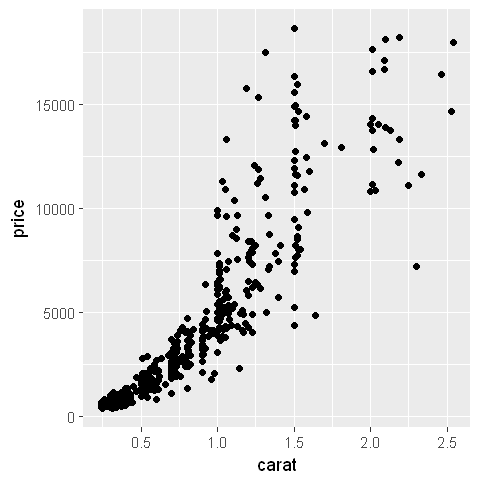

In [38]:
g + geom_point()

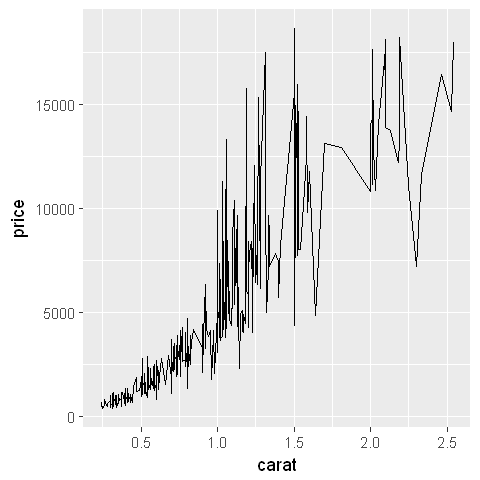

In [39]:
g + geom_line()

`geom_smooth()` using method = 'loess'


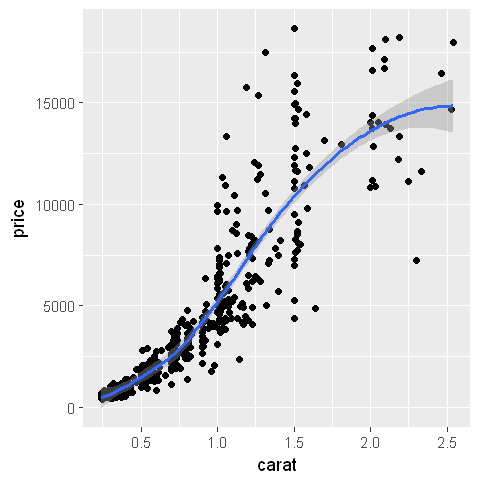

In [40]:
g + geom_point() + geom_smooth()

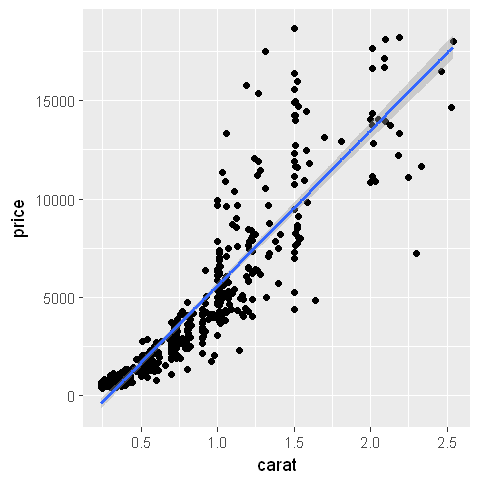

In [41]:
g + geom_point() + geom_smooth(method = "lm")

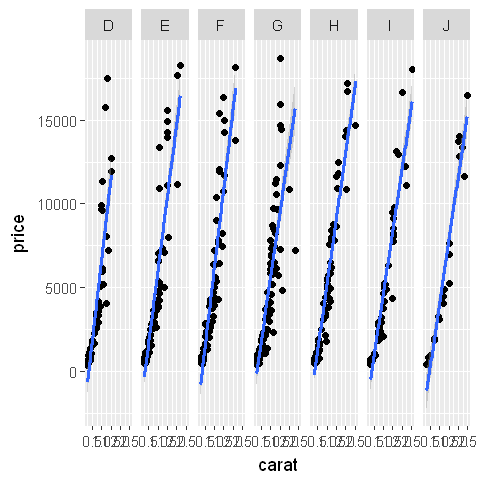

In [42]:
g + geom_point() + geom_smooth(method = "lm") + facet_grid(. ~ color)

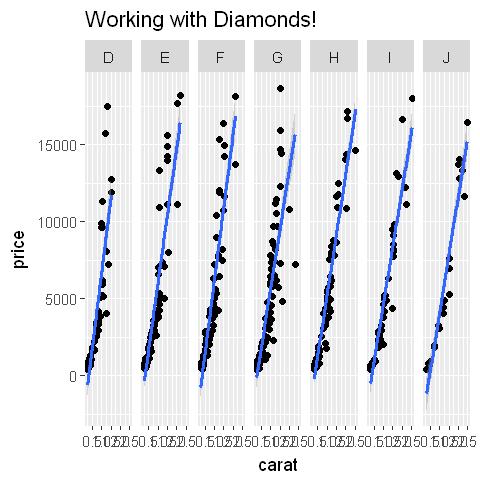

In [43]:
g + geom_point() + geom_smooth(method = "lm") + 
    facet_grid(. ~ color) + ggtitle("Working with Diamonds!")

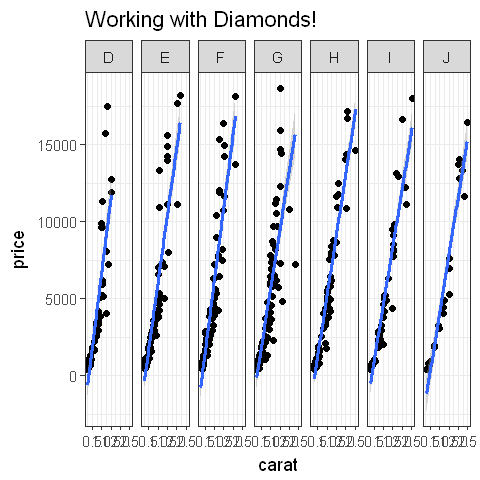

In [44]:
g + geom_point() + geom_smooth(method = "lm") + 
    facet_grid(. ~ color) + ggtitle("Working with Diamonds!") + theme_bw()

Let's practice modifying aesthetics now.

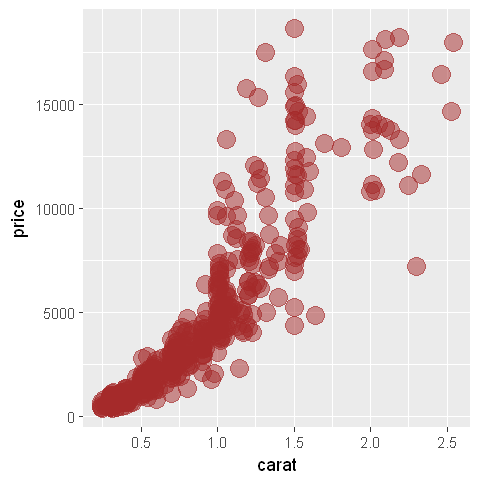

In [45]:
g + geom_point(color = "brown", size=5, alpha = 1/2)

We can see that some circles are more transparent than others, 
because they correspond to a higher frquency.

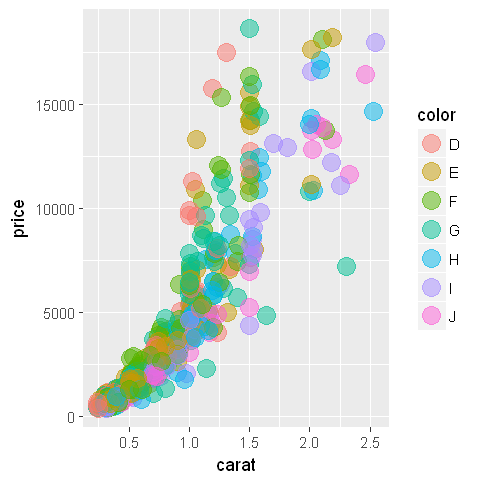

In [46]:
g + geom_point(size=5, alpha = 1/2, aes(color = color))

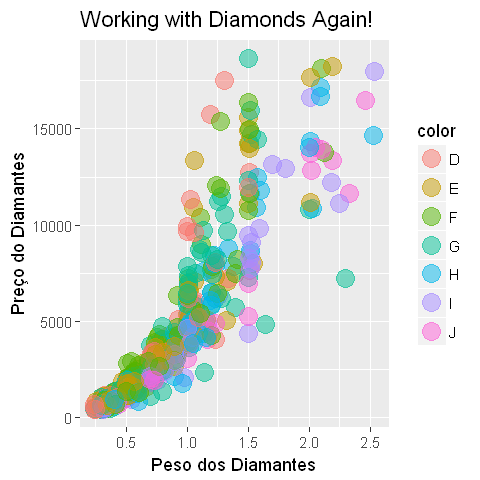

In [47]:
g + geom_point(size=5, alpha = 1/2, aes(color = color)) + 
    labs(title = "Working with Diamonds Again!") + 
    labs(x = "Peso dos Diamantes", y= "Preço do Diamantes")

We can add title and name axis with function labs().

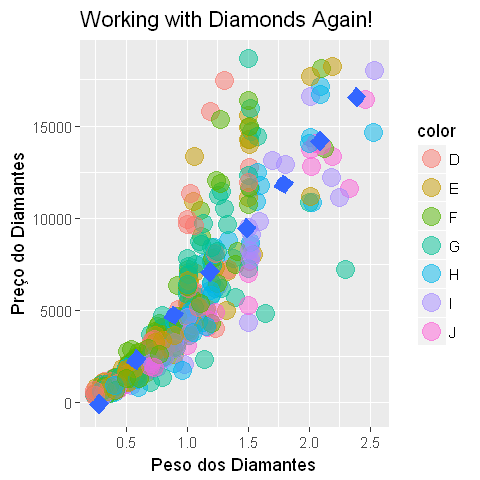

In [48]:
g + geom_point(size=5, alpha = 1/2, aes(color = color)) + 
    labs(title = "Working with Diamonds Again!") + 
    labs(x = "Peso dos Diamantes", y= "Preço do Diamantes") + 
    geom_smooth(size=4, linetype=3, method="lm", se=FALSE)

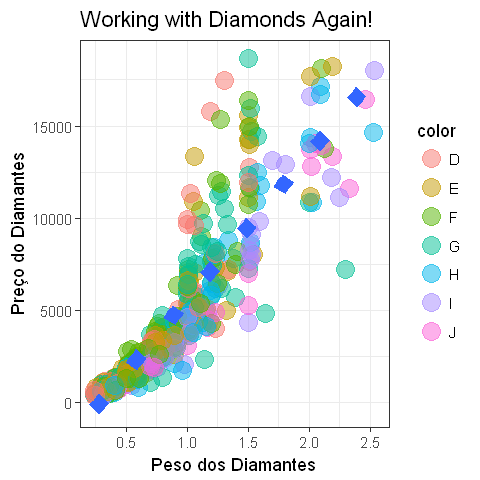

In [49]:
g + geom_point(size=5, alpha = 1/2, aes(color = color)) + 
    labs(title = "Working with Diamonds Again!") + 
    labs(x = "Peso dos Diamantes", y= "Preço do Diamantes") + 
    geom_smooth(size=4, linetype=3, method="lm", se=FALSE) + theme_bw()

Warning message:
"Removed 4 rows containing missing values (geom_path)."

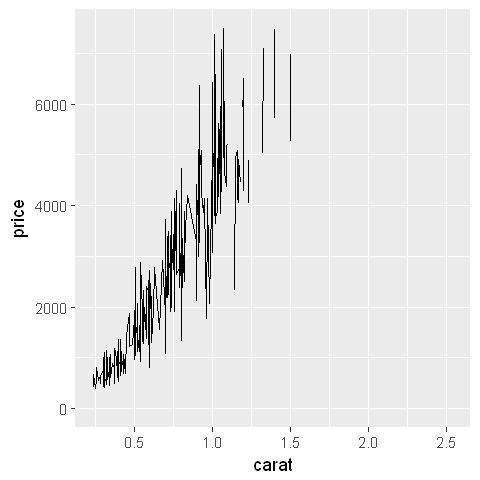

In [50]:
g + geom_line() + ylim(0, 7500)

How can we scale the axis?

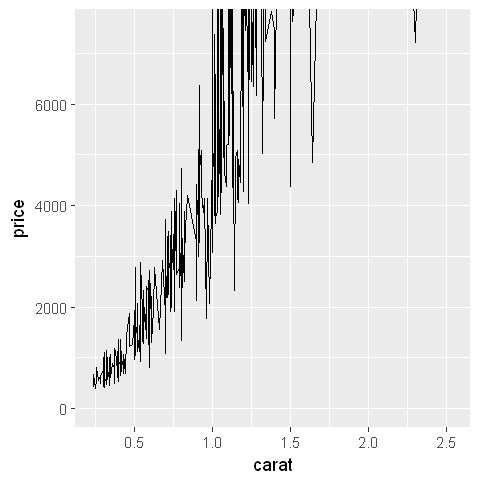

In [51]:
g + geom_line() + coord_cartesian(ylim = c(0, 7500))

Lets work a little bit more with Faceting.

In [73]:
str(mpg)

Classes 'tbl_df', 'tbl' and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


In [52]:
g <- ggplot(diamonds_small, aes(x = carat, y = price, color=factor(color)))

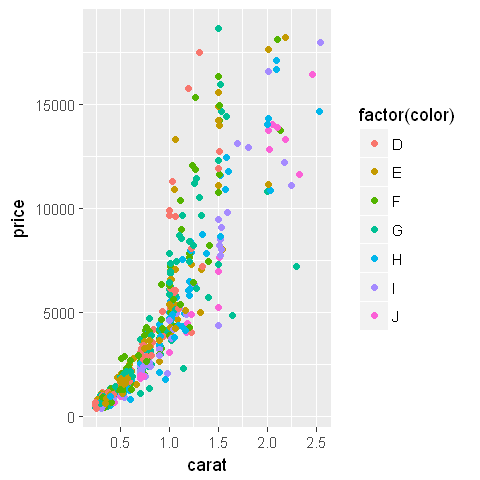

In [53]:
g + geom_point()

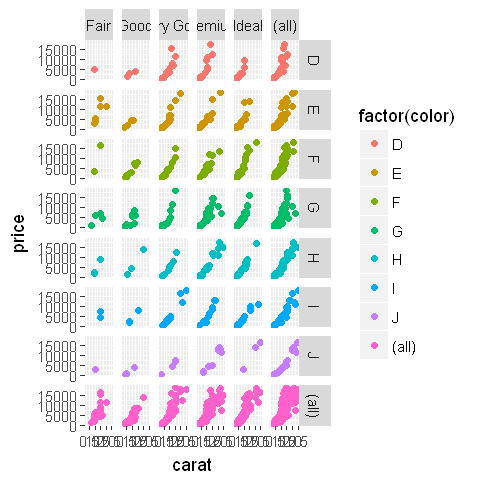

In [54]:
g + geom_point() + facet_grid(color~cut, margins=TRUE)

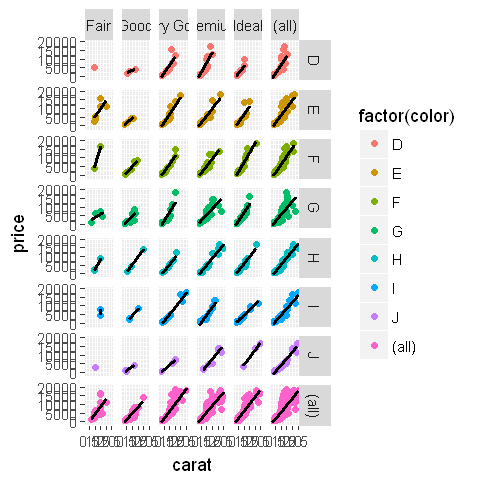

In [55]:
g + geom_point() + facet_grid(color~cut, margins=TRUE) +
    geom_smooth(method = "lm", se = FALSE, size = 1, color = "black")

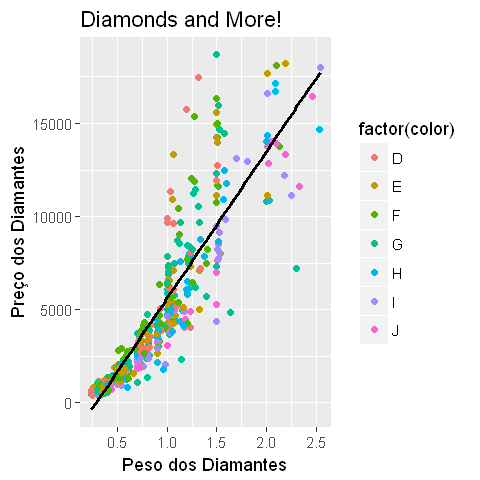

In [56]:
g + geom_point() +
    geom_smooth(method = "lm", se = FALSE, size = 1, color = "black") +
    labs(title = "Diamonds and More!", x = "Peso dos Diamantes", y = "Preço dos Diamantes")

Back to qplot() for "binwidth"!
    ------
    
Again with Diamonds.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


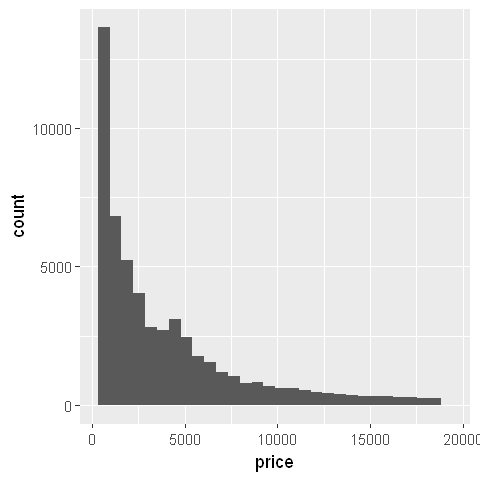

In [57]:
qplot(price, data = diamonds)

We get a message about the binwidth defaulting to range/30. 

Range refers to the spread or dispersion of the data, in this case price of diamonds. 

In [58]:
range(diamonds$price)

[1]   326 18823

In [59]:
price_range = 18823 - 326
price_range

[1] 18497

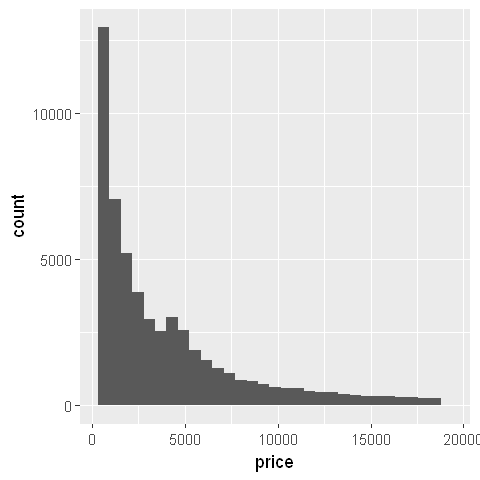

In [60]:
qplot(price, data = diamonds, binwidth = price_range/30)

No more messages in red, but a histogram almost identical to the previous one. 

18497/30 = 616.5667 

This means that the height of each bin tells you how many diamonds have a price between x and x+617 where x is the left edge of the bin.

In [61]:
multiples = c(0, 617, 1234, 1851, 2468, 3085, 3702, 4319, 4936, 5553, 6170, 6787,
    7404, 8021, 8638, 9255, 9872, 10489, 11106, 11723, 12340, 12957, 13574, 14191,
    14808, 15425, 16042, 16659, 17276, 17893, 18510, 19127)

multiples

[1]     0   617  1234  1851  2468  3085  3702  4319  4936  5553  6170  6787
[13]  7404  8021  8638  9255  9872 10489 11106 11723 12340 12957 13574 14191
[25] 14808 15425 16042 16659 17276 17893 18510 19127

In [62]:
counts = c(4611, 13255, 5230, 4262, 3362, 2567, 2831, 2841, 2203, 1666, 1445, 1112,
    987, 766, 796, 655, 606, 553, 540, 427, 429, 376, 348, 338,
    298, 305, 269, 287, 227, 251, 97)

counts

[1]  4611 13255  5230  4262  3362  2567  2831  2841  2203  1666  1445  1112
[13]   987   766   796   655   606   553   540   427   429   376   348   338
[25]   298   305   269   287   227   251    97

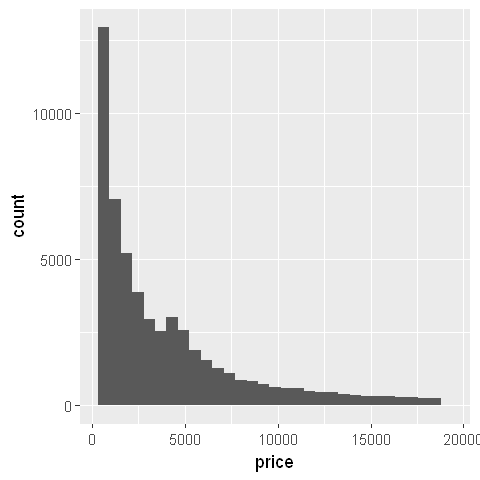

In [63]:
qplot(price, data = diamonds, binwidth = price_range/30)

Just to make sure:

In [64]:
sum(diamonds$price <= 617)

[1] 4611

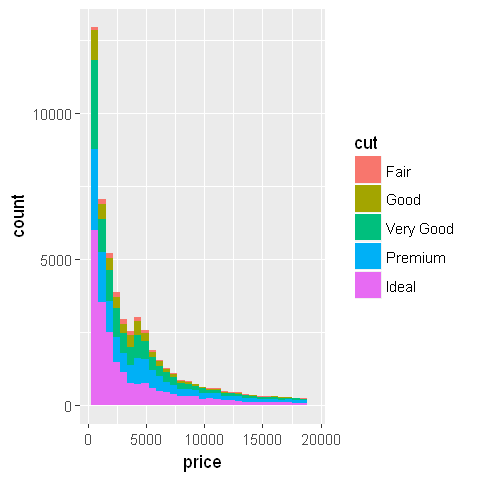

In [65]:
qplot(price, data = diamonds, binwidth = price_range/30, fill = cut)

The counts within each price grouping (bin) are distributed among the different cuts of diamonds. 

qplot displays these distributions relative to the cut legend on the right. 

The fair cut diamonds are at the bottom of each bin, the good cuts are above them, then the very good above them, until the ideal cuts are at the top of each bin. 

We can quickly see from this display that there are very few fair cut diamonds priced above $5000.

No it is not the end!
---------------------

How to plot HEAT MAPS, CORRELOGRAMAS and GEOGRAPHICAL MAPS?

HEAT MAP - uses intensity (density) of colors to display relationship between two or three or many variables in a two dimensional image.

CORRELOGRAM - used to test the level of correlation among the variable available in the data set.
Creating correlogram using its dedicated package is much easier than using ggplot.

GEOGRAPHICAL MAP - used to visualize certain factor been influenced geographically.

In [66]:
##some scaling again
options(repr.plot.width=4, repr.plot.height=3)

##simples data frame
a = c(1 ,2, 3, 1, 2, 3, 1, 2, 3)
b = c(2 ,3, 1, 3, 1, 2, 1, 2, 3)
c = seq(1,9, by=1)

our_data = data.frame(a, b, c, StringAsFactor = FALSE)

head(our_data)

a,b,c,StringAsFactor
1,2,1,FALSE
2,3,2,FALSE
3,1,3,FALSE
1,3,4,FALSE
2,1,5,FALSE
3,2,6,FALSE


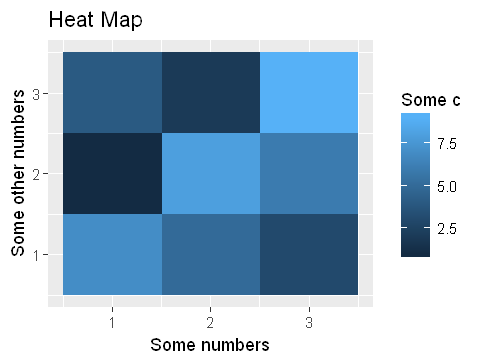

In [67]:
ggplot(our_data, aes(a, b)) + geom_raster(aes(fill = c)) +
    labs(title ="Heat Map", x = "Some numbers", y = "Some other numbers") +
    scale_fill_continuous(name = "Some c")


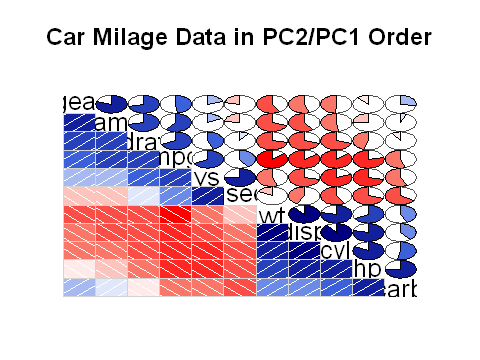

In [68]:
library(corrgram)
corrgram(mtcars, order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt,
  main="Car Milage Data in PC2/PC1 Order")

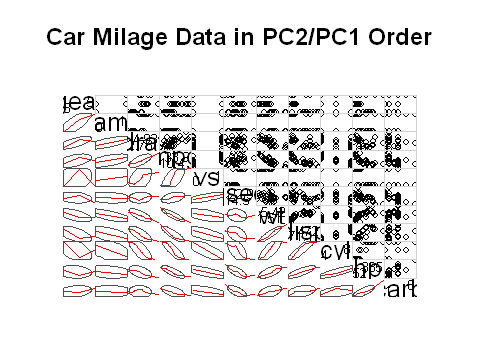

In [69]:
corrgram(mtcars, order=TRUE, lower.panel=panel.ellipse,
  upper.panel=panel.pts, text.panel=panel.txt,
  diag.panel=panel.minmax, main="Car Milage Data in PC2/PC1 Order")

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4
qsec,0.4,-0.6,-0.4,-0.7,0.1,-0.2,1.0,0.7,-0.2,-0.2,-0.7
vs,0.7,-0.8,-0.7,-0.7,0.4,-0.6,0.7,1.0,0.2,0.2,-0.6
am,0.6,-0.5,-0.6,-0.2,0.7,-0.7,-0.2,0.2,1.0,0.8,0.1
gear,0.5,-0.5,-0.6,-0.1,0.7,-0.6,-0.2,0.2,0.8,1.0,0.3


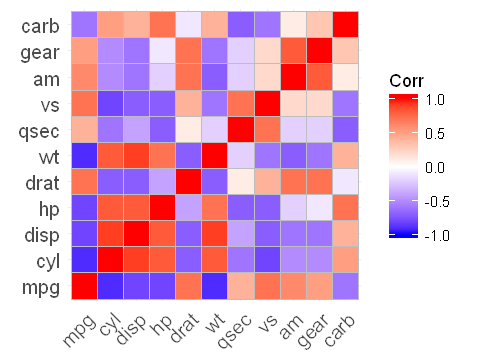

In [70]:
# ggplot2 package is needed here
library(ggcorrplot)

data(mtcars)
corr <- round(cor(mtcars), 1)
corr

ggcorrplot(corr)

In [72]:
library(maps)

top_25 <- c("Iceland", "Denmark", "Austria", "Portugal","Czech Republic","Switzerland",
                        "Slovenia","Finland","Ireland","Sweden")

countries <- geocode(top_25)

nation.x <- countries$lon
nation.y <- countries$lat

mapWorld <- borders("world", colour="grey", fill="lightblue")

ggplot() + mapWorld + geom_point(aes(x=visit.x, y=visit.y) ,color="red", size=3)

ERROR: Error in eval(expr, envir, enclos): could not find function "geocode"
